# 군집화 : 군집 평가 (Cluster Evaluation)

#### 군집화 평가
- 비지도 학습 특성상
    - 어떤 지표라도 정확하게 성능 평가하기 어려움
    - 대표적으로 알려져있는 성능평가 방법 : 실루엣분석
    - 군집의 수를 참고하기 위한 방법 : 엘보우차트
    
실루엣 분석 (Silhouette Analysis)
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 분석
- 효율적 분리 의미
    - 다른 군집과의 거리는 떨어져 있고
    - 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있음

- 실루엣 계수(Silhouette coefficient) 기반
    - 개별 데이터가 가지는 군집화 지표로
        - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고
        - 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표

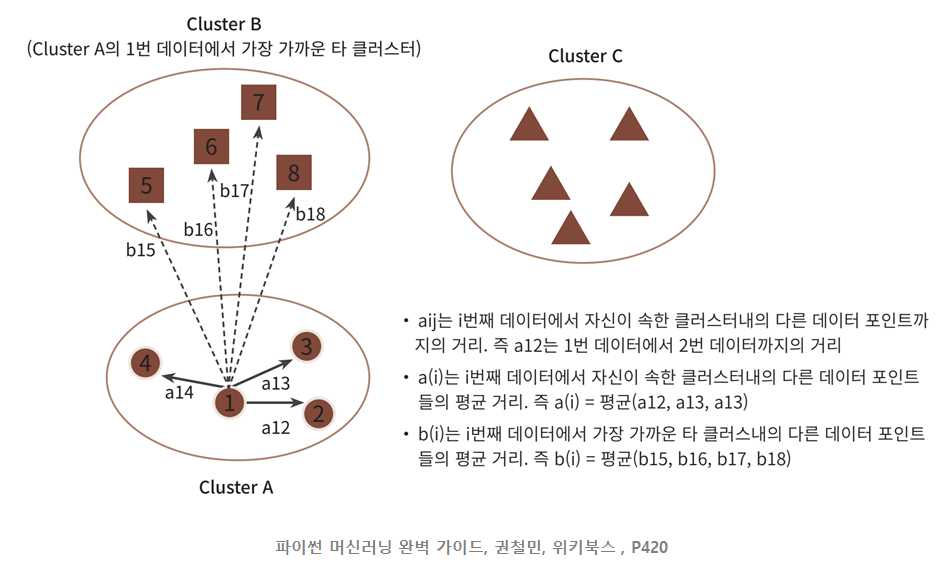

**특정 데이터 포인트의 실루엣 계수** 
- 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 : a(i)
- 해당 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 : b(i)를 기반으로 계산

    **두 군집 간의 거리가 얼마나 떨어져 있는가의 값**
    -  b(i) - a(i)
        - -1에서 1 사이의 값
        - 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고
        - 0에 가까울수록 근처의 군집과 가까워진다는 것    

        - - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미

#### 실루엣 분석을 위한 사이킷런 메서드
- sklearn.metrics 모듈의 silhouette_samples()
    - 인자 : 피처 데이터, 레이블 값
    - 반환값 : 각 데이터 포인트의 실루엣 계수
- sklearn.metrics 모듈의 silhouette_score()
    - 인자 : 피처 데이터, 레이블 값
    - 반환값 : 전체 데이터의 실루엣 계수 평균 값
        - 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단
        - 하지만 무조건 높다고 군집화가 잘 됐다고 판단할 수는 없음

#### 좋은 군집화가 되기 위한 기준
- 전체 실루엣 계수의 평균값 : silhouette_score() 값이 0~1 사이의 값을 갖고, 1에 가까울수록 좋음
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함
- 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요

- 만일, 전체 실루엣 계수의 평균값은 높지만, 
- 특정 군집의 실루엣 계수 평균값만 유난히 높고 
- 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님

### IRIS 데이터 셋을 이용한 클러스터 평가

- 앞의 Iris 데이터세트의 군집화 결과를 실루엣 분석으로 평가
- silhouette_samples()/silhouette_score() 사용

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

In [3]:
# 군집화 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [4]:
# iris의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (150,)


In [5]:
# iris에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff']=score_samples

In [6]:
irisDF.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454
149,5.9,3.0,5.1,1.8,0,0.185442


In [7]:
# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.553


In [8]:
# 군집별 평균 실루엣 계수 값 확인
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

#### 결과
- 0번, 2번 군집의 평균이 1번에 비해 상대적으로 너무 낮음
- 좋은 군집은 아닌걸로 보임

### 군집 계수에 따른 k-평균 군집화 실루엣 분석

**사이킷런 튜토리얼 예제**

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


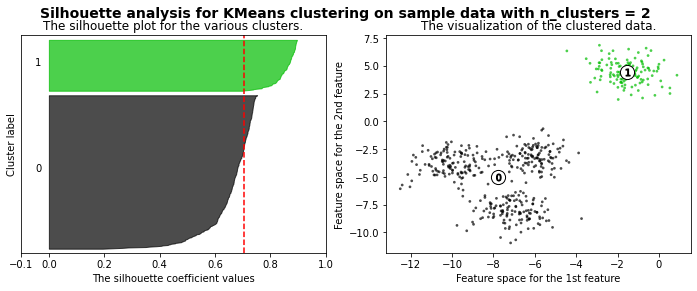

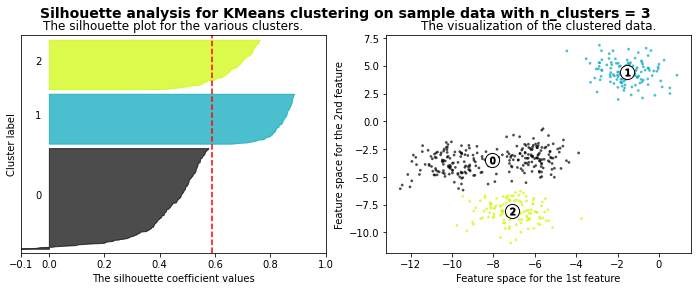

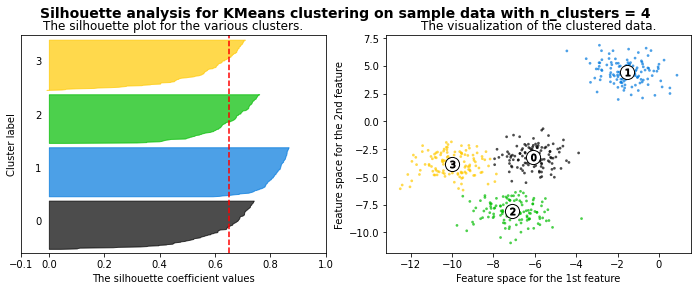

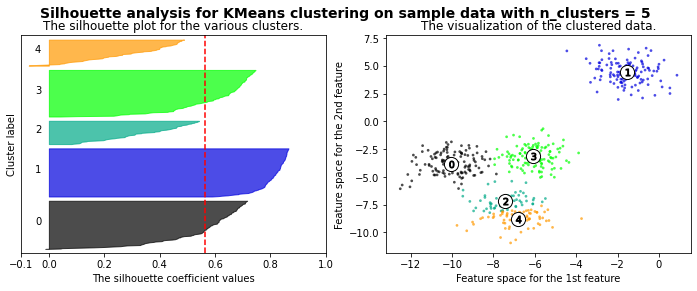

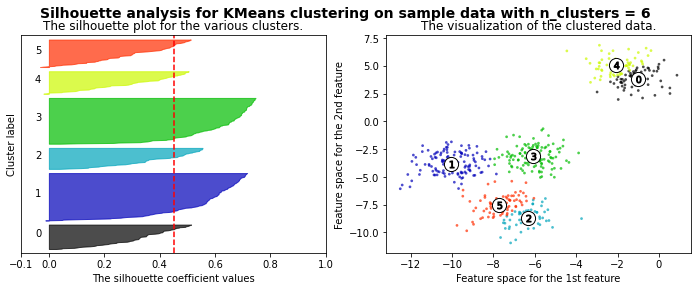

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**붓꽃 데이터를 이용해 k-평균 수행 시 최적의 군집 개수 확인**

In [10]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

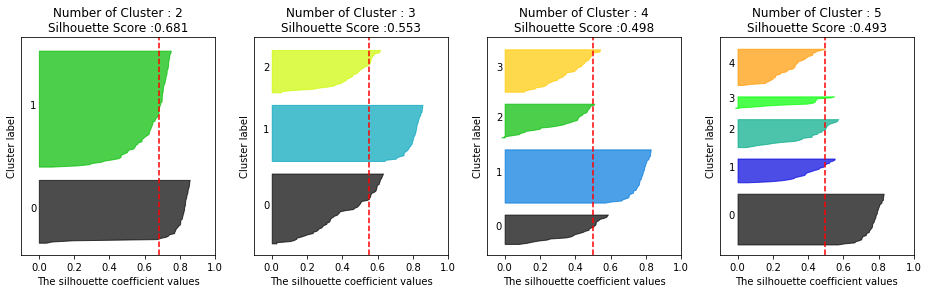

In [11]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

### 그래프 결과
- 군집 개수를 2개로 하는것이 가장 좋아 보임
- 3개의 경우 : 평균 실루엣 계수 값도 2개 보다 작고 1번 군집과 2,0 군집과의 편차가 큼

# 엘보우 차트 사용
- kmeans에만 적용 가능
- 최적의 군집 수 확인
- SSE(Sum of Squared Errors) 값을 계산하여 그래프로 나타내어 최적의 K값을 선택하는 방법
    - SSE란 각 데이터 포인트와 해당 클러스터 중심점 사이의 거리를 제곱한 값의 합을 의미
    - SSE 값이 작을수록 클러스터링의 성능이 좋다고 판단할 수 있다
    - kmeans.inertia_ 속성을 사용

In [12]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [13]:
X=irisDF.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
# sse 계산
sse= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [16]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

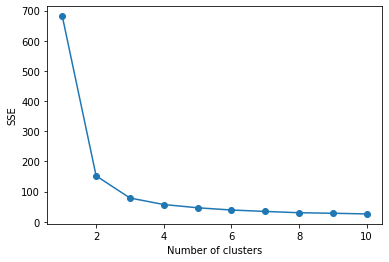

In [17]:
# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### 군집 수 2,3에서 그래프가 꺾임(팔꿈치)
- 2가 가장 최적이며 3도 사용 가능한 수준
    - 4 이상부터는 변화가 거의 없음